___
## Ciência dos Dados - PROJETO 3 - INSPER

___
#### Bruno Morales Balkins

#### Daniel do Carmo Granja de Castro

#### Omar Dibo Calixto Afrange Neto
___

# Qual a chance de um estudante entrar em uma faculdade baseado em diversos parametros relacionados a notas em exames e qualidade da faculdade.

___

## A. INTRODUÇÃO

Nesse trabalho iremos abordar 4 formas distintas de prever a chance de um aluno americano qualquer entrar em uma faculdade americana qualquer. Para isso utilizaremos uma base de dados que contem informações sobre alguns candidatos de universidades variadas. As variáveis incluem notas em alguns testes, experiência com pesquisa, carta de recomendação e outros quesitos necessários, além disso ela traz a probabilidade dele ser aceito na universidade desejada. O intuito principal deste projeto é prever a probabilidade do aluno conseguir passar na universidade e alem disso entender qual das formas de predicao e melhor e porque.

___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

### BASE DE DADOS

In [3]:
dados = pd.read_csv('Admission_Predict.csv')
dados

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Serial No.: Número de série do aluno

GRE Scores: Nota do aluno no teste GRE

TOEFL Scores: Nota do aluno no teste TOEFL

University Rating: Classificação do nível de ensino da universidade desejada

Statment of purpose (SOP): Qualidade do texto sobre o objeto de pesquisa do aluno

Letter of recomendation (LOR): Qualidade da carta de recomendação do aluno

Undergraduate Grade Point Average (CGPA): Média acadêmica do aluno

Research: Experiência com pesquisa. 1- Sim, 2- Não

Change of Admission: Probabilidade de admissão do aluno

In [4]:
dados = dados.drop("Serial No.",axis=1)

### ANÁLISE DESCRITIVA

**Variáveis Quantitativas**

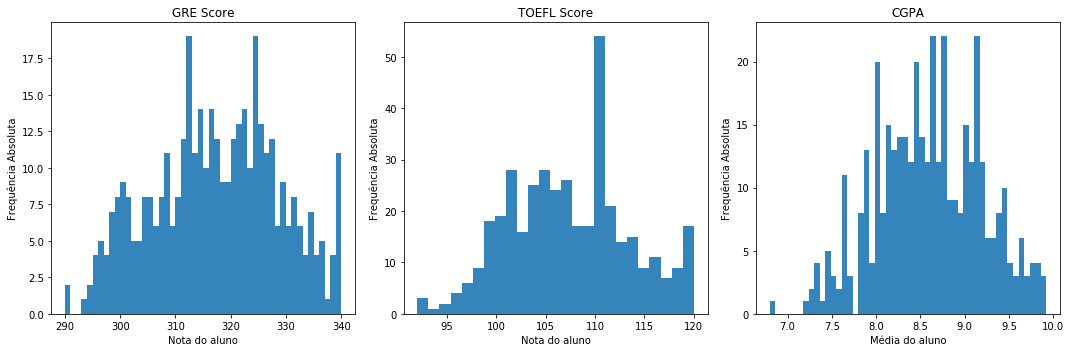

In [5]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = dados["GRE Score"].plot.hist(bins=50,title='GRE Score', alpha=0.9)
plt.ylabel('Frequência Absoluta')
plt.xlabel('Nota do aluno')

plt.subplot(132)
plot = dados["TOEFL Score"].plot.hist(bins=25,title='TOEFL Score', alpha=0.9)
plt.ylabel('Frequência Absoluta')
plt.xlabel('Nota do aluno')

plt.subplot(133)
plot = dados["CGPA"].plot.hist(bins=50,title='CGPA', alpha=0.9)
plt.ylabel('Frequência Absoluta')
plt.xlabel('Média do aluno')

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Nota do aluno')

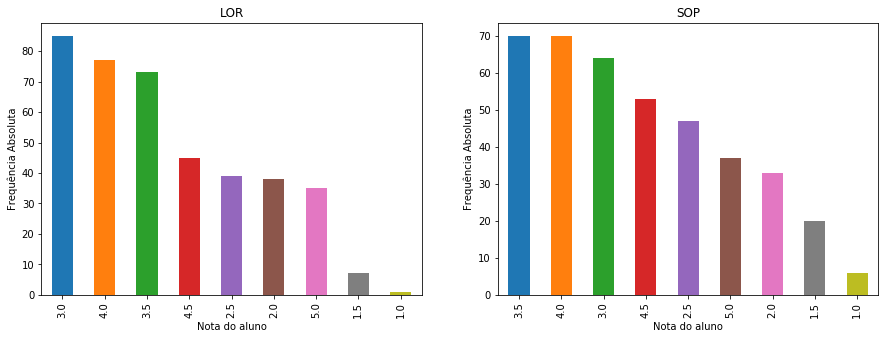

In [6]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(121)
adQuantitativa2 = dados["LOR "].value_counts()
plot = adQuantitativa2.plot(kind='bar', legend=False,title="LOR");
plt.ylabel('Frequência Absoluta')
plt.xlabel('Nota do aluno')

plt.subplot(122)
adQuantitativa3 = dados["SOP"].value_counts()
plot = adQuantitativa3.plot(kind='bar', legend=False,title="SOP");
plt.ylabel('Frequência Absoluta')
plt.xlabel('Nota do aluno')

**Variável Qualitativa**

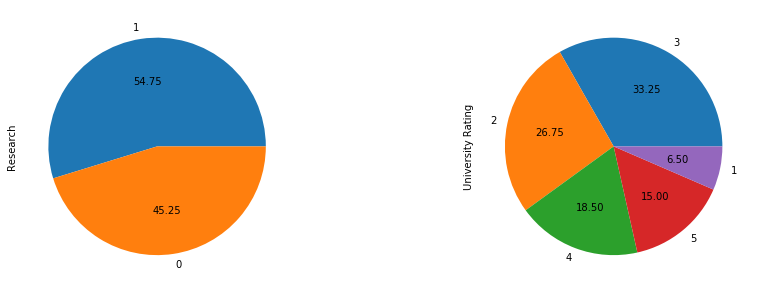

In [7]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(121)
adQualitativa = dados['Research'].value_counts()
adQualitativa.plot(kind='pie', autopct="%0.2f",legend=False);

plt.subplot(122)
adQuantitativa = dados['University Rating'].value_counts()
adQuantitativa.plot(kind='pie', autopct="%0.2f",legend=False);

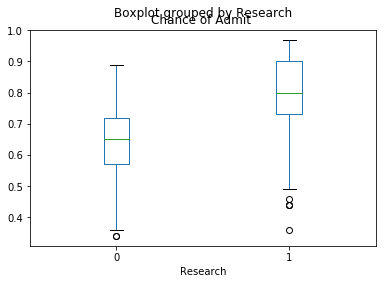

In [8]:
dados.boxplot(column=['Chance of Admit '], by='Research', grid=False);

Após a análise univariada vamos estudar como elas se correlacionam. Utilzaremos uma matriz de cores para entender a influência de cada uma delas.

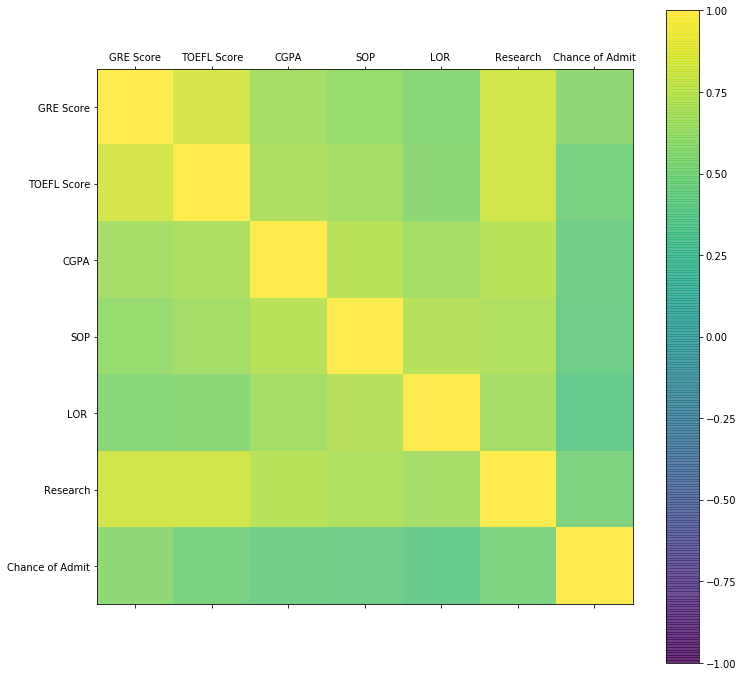

In [9]:
correl = dados.iloc[:,:7].corr()
correl
names = ['GRE Score','TOEFL Score','CGPA','SOP','LOR ','Research','Chance of Admit']
d = len(names)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correl, interpolation='none', vmin=-1, vmax=1 ,alpha=0.8)
fig.colorbar(cax)
ticks = np.arange(0,d,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.show()

___
## C. MODELOS DE PREDIÇÃO

In [10]:
trainingSet, testSet = train_test_split(dados, test_size = 0.25)

In [11]:
X_treinamento = trainingSet[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ','CGPA', 'Research']]
X_teste = testSet[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ','CGPA', 'Research']]

Y_treinamento = trainingSet['Chance of Admit ']
Y_teste = testSet['Chance of Admit ']
X_treinamento_quali = trainingSet[['Research']]
X_teste_quali = testSet[['Research']]

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

In [49]:
mu = Y_treinamento.mean()
mu2 = Y_teste.mean()
mu

0.7271666666666661

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

In [51]:
X2=dados[['CGPA','TOEFL Score','GRE Score','University Rating','SOP','LOR ']]
Y2=dados['Chance of Admit ']
X_treinamento,X_teste,y_treinamento,y_teste = train_test_split(X2,Y2,test_size=.25,random_state=0)

<function matplotlib.pyplot.show(*args, **kw)>

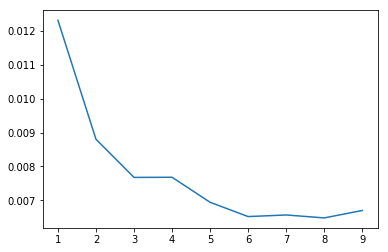

In [52]:
lista_valorK=np.arange(1,10,1)
lista_resultadoK=[]
for e in lista_valorK:
    clf=KNeighborsRegressor(e)
    clf.fit(X_treinamento,y_treinamento)
    y_pred=clf.predict(X_tes)
    lista_resultadoK.append(mean_squared_error(y_teste,y_pred))
    
plt.plot(lista_valorK, lista_resultadoK)    
plt.show

Percebe-se pelo gráfico que o melhor valor para K é 6

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

In [18]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [19]:
results = regress(X_treinamento,Y_treinamento)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     168.8
Date:                Tue, 28 May 2019   Prob (F-statistic):           1.06e-98
Time:                        22:38:09   Log-Likelihood:                 406.39
No. Observations:                 300   AIC:                            -796.8
Df Residuals:                     292   BIC:                            -767.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1949      0.141     -8.469      0.000      -1.473      -0.917
GRE Score             0.0014      0.001      2.078      0.039    7.43e-05       0.003
TOEFL Score           0.0029      0.001      2.308      0.022       0.000       0.005
University Rating     0.0037      0.005      0.698      0.486      -0.007       0.014
SOP                   0.0038      0.006      0.596      0.552      -0.009       0.016
LOR                   0.0128      0.007      1.967      0.050   -4.58e-06       0.026
CGPA                  0.1251      0.014      9.215      0.000       0.098       0.152
Research              0.0335      0.009      3.672      0.000       0.016       0.051
==============================================================================
Omnibus:                       72.288   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.374
Skew:                          -1.226   Prob(JB):                     6.04e-33
Kurtosis:                       5.420   Cond. No.                     1.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
y_p_treinamento = results.predict(sm.add_constant(X_treinamento))
y_p_teste = results.predict(sm.add_constant(X_teste))
y_p_treinamento, y_p_teste

(215    0.902907
 114    0.698296
 312    0.799621
 119    0.778491
 394    0.858775
 207    0.647263
 343    0.609505
 278    0.660639
 221    0.712864
 9      0.709044
 327    0.536661
 64     0.737568
 391    0.696817
 27     0.523295
 361    0.910718
 367    0.497420
 399    0.937435
 395    0.811216
 105    0.782219
 47     0.924902
 336    0.724680
 170    0.635784
 254    0.819920
 356    0.785172
 51     0.611585
 99     0.806801
 3      0.749284
 321    0.725706
 349    0.600924
 37     0.538379
          ...   
 267    0.677790
 66     0.782664
 125    0.688991
 172    0.844510
 228    0.730690
 146    0.662030
 174    0.813144
 44     0.885304
 309    0.697490
 19     0.651138
 22     0.924039
 324    0.644162
 208    0.617416
 206    0.579286
 258    0.784462
 201    0.715949
 65     0.773556
 339    0.768772
 209    0.652950
 167    0.630695
 366    0.713519
 185    0.853172
 34     0.950402
 217    0.827370
 295    0.661731
 157    0.619529
 135    0.770631
 96     0.5814

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

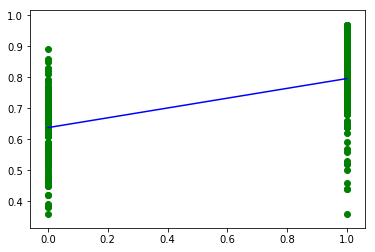

In [22]:
X3 = trainingSet[["Research"]]
Y3 = trainingSet["Chance of Admit "]
regressor = DecisionTreeRegressor(random_state = 1)
regressor.fit(X3, Y3)
plt.scatter(X3, Y3, color = 'green')
plt.plot(X3, regressor.predict(X3), color = 'blue')
plt.show()

In [23]:
arvore_previsao = regressor.predict(X_treinamento_quali)
arvore_previsao2 = regressor.predict(X_teste_quali)

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

**MEDIA**

In [57]:
adm = (Y_treinamento - mu)**2
adm2 = (Y_teste - mu)**2

In [58]:
x = adm.mean()
y = adm2.mean()

In [59]:
rmstreino = x**0.5
rmsteste = y**0.5
rmstreino, rmsteste

(0.14026750237393631, 0.14883926826539348)

**KNN PROXIMOS**

In [68]:
clf=KNeighborsRegressor(6)
clf.fit(X_treinamento,y_treinamento)
y_pred_treinamento=clf.predict(X_treinamento)
print('y treinamento predito vale:{0}'.format(mean_squared_error(y_treinamento,y_pred_treinamento)))

y treinamento predito vale:0.00424837037037037


In [69]:
y_pred_teste=clf.predict(X_teste)
print('y teste predito vale:{0}'.format(mean_squared_error(y_teste,y_pred_teste)))

y teste predito vale:0.006526027777777777


**Cálculo do RMS**

In [80]:
RMS_KNN_treinamento = (((y_treinamento-y_pred_treinamento)**2).mean())**0.5
RMS_KNN_teste = (((y_teste-y_pred_teste)**2).mean())**0.5
RMS_KNN_treinamento, RMS_KNN_teste

(0.0651795241649582, 0.08078383364125384)

**Cálculo do R2**

In [84]:
R2_KNN_treinamento = 1-(((y_treinamento-y_pred_treinamento)**2).mean()/((y_treinamento-(y_treinamento).mean())**2).mean())
R2_KNN_teste = 1-(((y_teste-y_pred_teste)**2).mean()/((y_teste-(y_teste).mean())**2).mean())
R2_KNN_treinamento, R2_KNN_teste

(0.799770255805691, 0.6260436736395276)

**REGRESSAO LINEAR**

In [60]:
reg = (Y_treinamento - y_p_treinamento)**2

reg2 = (Y_teste - y_p_teste)**2

In [61]:
x2 = reg.mean()
y2 = reg2.mean()

In [62]:
rmstreino2 = x2**0.5
rmsteste2 = y2**0.5

In [63]:
rmstreino2, rmsteste2

(0.0624395775391526, 0.06682429858158814)

In [64]:
reg_X = (Y_treinamento - mu)**2
reg_Y = (Y_teste - mu2)**2

In [65]:
r2reg = 1 - (reg.sum()/reg_X.sum())
r2reg2 = 1 - (reg2.sum()/reg_Y.sum())

In [42]:
r2reg, r2reg2

(0.8018446583185314, 0.7972646707886728)

**ARVORE DE DECISAO**

In [43]:
tree01=(Y_treinamento-arvore_previsao)**2
tree012=tree01.mean()
tree012=tree012**0.5
tree012

0.11628145303425932

In [44]:
tree02=(Y_teste-arvore_previsao2)**2
tree022=tree02.mean()
tree022=tree022**0.5
tree022

0.12549483511437473

In [45]:
tree01_media=(Y_treinamento-mu)**2
tree02_media=(Y_teste-mu)**2

In [46]:
R2_tree01=1-(tree01.sum()/tree01_media.sum())
R2_tree01

0.3127626221252433

In [47]:
R2_tree02=1-(tree02.sum()/tree02_media.sum())
R2_tree02

0.2890866789392067

___
## E. CONCLUSÃO

Baseando-se em nossos quatro modelos de predicao para prever qual a chance de um aluno (nos EUA), baseado em 7 variaveis, de ingressar em determinada universidade, podemos perceber clara diferenca de precisao entre a predicao pela media que possui uma valor de RMS alto, indicando que o modelo nao e tao preciso, ja os modelos de predicao pelo KNN proximo e pela arvore de decisao(DecisionTreeRegressor) sao superiores ao modelo de predicao pela media, porem nao chegam ao mesmo patamar de acerto da regressao linear que apresenta um RMS relativamente bem baixo em relacao aos demais.

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS

https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/

https://www.kaggle.com/mohansacharya/graduate-admissions